In [1]:
# Time series for deep-fjord temperature (Ts)
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def vol_temp(datapath, case_id, xid):
    

    State0 = xr.open_dataset(datapath+'/state_' + str(format(case_id,'03d')) + '.nc')
    Grid = xr.open_dataset(datapath+'/grid_' + str(format(case_id,'03d')) + '.nc')
    State = State0.isel(T=~State0.get_index("T").duplicated())    
    # Confine to the range of fjord
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), T=range(1,len(State.T)))
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45))
    
    #depth = state.Z.data
    U = (state.U.data[:,:,:,1:] + state.U.data[:,:,:,:-1]) / 2
    Uymean = U.mean(2)
    T = state.Temp.data.mean(2) # Average in Y direction
    Day = state.T.data / 86400
    #S = state.S.data
    #sma = np.ma.masked_where(S==0, S)
    #topo = np.ma.getmask(sma) # Masked Topography
    #Uma = np.ma.MaskedArray(U, mask=topo)
    #Tma = np.ma.MaskedArray(T, mask=topo)
    
    drF = np.broadcast_to(grid.drF.data[np.newaxis, :, np.newaxis, np.newaxis], U.shape)
    dyF = np.broadcast_to(grid.dyF.data[np.newaxis, np.newaxis, :, :], U.shape)
    HFacC = np.broadcast_to(grid.HFacC.data[np.newaxis, :, :, :], U.shape)
    DA = drF * dyF * HFacC
    
    #rA = np.broadcast_to(grid.rA.data[np.newaxis, np.newaxis, :, :], U.shape)
    #CV = rA * drF * HFacC
    u_steady = Uymean[89:,:,:].mean(0)
    u_neg = np.where(u_steady[:,xid] < 0)[-1] # find the negative along-fjord velocity
    l = u_neg[u_neg>=7].min() # locate the layer interface below the sill depth[7]=-15m 
    
    da = DA.mean(2)
    
    Ts = np.empty(U.shape[0])
    for t in range(U.shape[0]):
        
        #Ts[t] = np.sum(T[t,l:,xid]*da[t,l:,xid]*Uymean[t, l:,xid]) / np.sum(da[t,l:,xid]*Uymean[t,l:,xid])
        Ts[t] = np.sum(T[t,l:,xid]*da[t,l:,xid]) / np.sum(da[t,l:,xid])
        
    
    return Ts

In [3]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
S0, S1 = 6, 120
day = np.arange(0.5, 60.5, 0.5)

TsS01 = vol_temp(path1, 1, S0)
TsS02 = vol_temp(path1, 2, S0)
TsS03 = vol_temp(path1, 3, S0)
TsS04 = vol_temp(path1, 4, S0)
TsS05 = vol_temp(path1, 5, S0)

TsS11 = vol_temp(path1, 1, S1)
TsS12 = vol_temp(path1, 2, S1)
TsS13 = vol_temp(path1, 3, S1)
TsS14 = vol_temp(path1, 4, S1)
TsS15 = vol_temp(path1, 5, S1)

In [4]:
#np.arange(0.5,60.5,0.5), day
TsS01

array([9.94397452, 9.92736561, 9.90901999, 9.89187835, 9.87752982,
       9.86231476, 9.84882296, 9.83328627, 9.81907117, 9.80638251,
       9.78948705, 9.77570401, 9.76065488, 9.74432058, 9.73118098,
       9.71960075, 9.70724733, 9.69595587, 9.68487029, 9.67250742,
       9.66177936, 9.6502637 , 9.63875061, 9.62715203, 9.61501369,
       9.60378461, 9.59157795, 9.57950591, 9.56692011, 9.55502922,
       9.54157354, 9.52951242, 9.51585726, 9.50337118, 9.48969524,
       9.47707801, 9.46392237, 9.45036267, 9.43741501, 9.42372295,
       9.41062626, 9.39716082, 9.38416622, 9.37185277, 9.35947233,
       9.34872993, 9.33845258, 9.32885198, 9.32063843, 9.31208088,
       9.30398592, 9.29654147, 9.2881684 , 9.28043222, 9.27282379,
       9.26475756, 9.25718332, 9.24938756, 9.24144938, 9.23402373,
       9.22606269, 9.21826261, 9.21084254, 9.20323364, 9.19570358,
       9.18815753, 9.18059365, 9.17294237, 9.16560324, 9.15797369,
       9.15045484, 9.14293937, 9.13545077, 9.1278546 , 9.12030

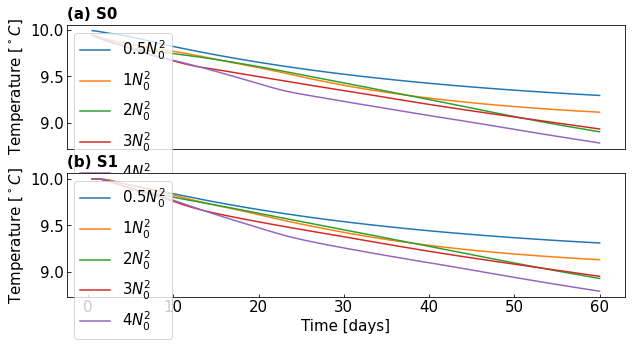

In [5]:
# Making time-series plot
fig0 = plt.figure(figsize=(10,5))
fig0.tight_layout()

# Plot Ts at section S0
ax1 = fig0.add_subplot(211)
    
ax1.plot(day,TsS05,label=r'$0.5N_0^2$')
ax1.plot(day,TsS04,label=r'$1N_0^2$')
ax1.plot(day,TsS03,label=r'$2N_0^2$')
ax1.plot(day,TsS02,label=r'$3N_0^2$')
ax1.plot(day,TsS01,label=r'$4N_0^2$')
ax1.legend(loc='best',fontsize=15)
    
#ax1.axvline(x=0,color='k',linestyle=':')
#ax1.set_xlabel(r'Time [days]', size=15)
ax1.xaxis.set_visible(False)
ax1.set_ylabel(r'Temperature [$^\circ C$]', size=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.tick_params(direction='in', labelsize=15)


# Plot Ts at section S1
ax2 = fig0.add_subplot(212)
    
ax2.plot(day,TsS15,label=r'$0.5N_0^2$')
ax2.plot(day,TsS14,label=r'$1N_0^2$')
ax2.plot(day,TsS13,label=r'$2N_0^2$')
ax2.plot(day,TsS12,label=r'$3N_0^2$')
ax2.plot(day,TsS11,label=r'$4N_0^2$')
ax2.legend(loc='best',fontsize=15)
    
#ax1.axvline(x=0,color='k',linestyle=':')
ax2.set_xlabel(r'Time [days]', size=15)
ax2.set_ylabel(r'Temperature [$^\circ C$]', size=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)